# 下山さんのコードパクったndimage.pyテスト
- https://github.com/ak110/pytoolkit/blob/master/pytoolkit/ndimage.py

In [4]:
%matplotlib inline
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:96% !important; }</style>"))
%reload_ext autoreload
%autoreload 2

# モジュールimport
import os, sys
current_dir = os.path.dirname(os.path.abspath("__file__"))
path = os.path.join(current_dir, '../../')
sys.path.append(path)
from transformer import ndimage
from dataset import util

out_dir = 'output_test'

util.py: loaded as module file


## ndimage.load():画像の読み込み

In [2]:
img = ndimage.load(r'D:\work\ImgLabeling_SIGNATE_Contest\OrigData\test_images\test_0.jpg')
print(img.shape)

(96, 96, 3)


In [3]:
img = ndimage.load(r'D:\work\ImgLabeling_SIGNATE_Contest\OrigData\test_images\test_0.jpg', grayscale=True)
print(img.shape)

(96, 96, 1)


## save():画像の保存

(96, 96, 3)


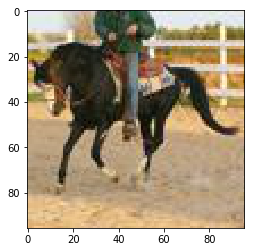

In [5]:
img = ndimage.load(r'D:\work\ImgLabeling_SIGNATE_Contest\OrigData\test_images\test_0.jpg')

ndimage.save(out_dir+'/ndimage.save.jpg', img)

img = ndimage.load(out_dir+'/ndimage.save.jpg')
print(img.shape)

util.show_np_img(img)

## 画像変換関数

In [5]:
img = ndimage.load(r'D:\work\ImgLabeling_SIGNATE_Contest\OrigData\test_images\test_0.jpg')

回転


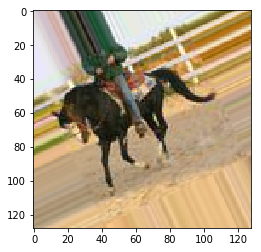

切り抜き


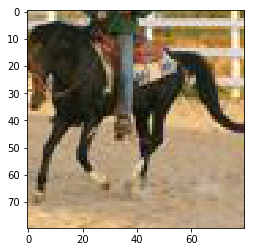

左右反転


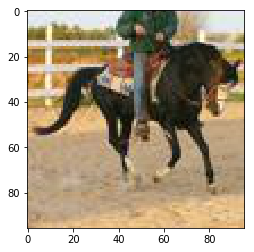

上下反転


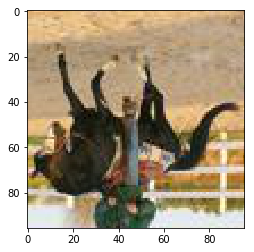

長辺の長さを指定したアスペクト比維持のリサイズ


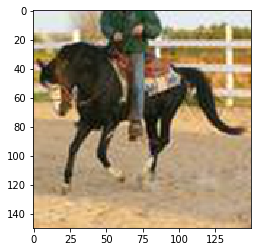

リサイズ


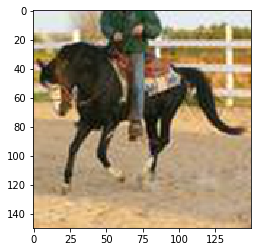

In [3]:
print('回転')
img_conv = ndimage.rotate(img, 25)
util.show_np_img(img_conv)

print('切り抜き')
img_conv = ndimage.crop(img, 10, 10, 80, 80)
util.show_np_img(img_conv)

print('左右反転')
img_conv = ndimage.flip_lr(img)
util.show_np_img(img_conv)

print('上下反転')
img_conv = ndimage.flip_tb(img)
util.show_np_img(img_conv)

print('長辺の長さを指定したアスペクト比維持のリサイズ')
img_conv = ndimage.resize_long_side(img, 150)
util.show_np_img(img_conv)

print('リサイズ')
img_conv = ndimage.resize(img, 150, 150)
util.show_np_img(img_conv)

ガウシアンノイズ


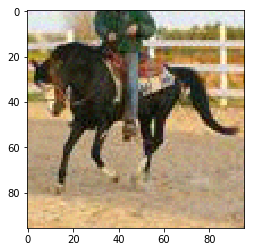

In [7]:
print('ガウシアンノイズ')
import numpy as np
#img_conv = ndimage.gaussian_noise(img, rand=np.random.RandomState(42), scale=25)
img_conv = ndimage.gaussian_noise(img)
util.show_np_img(img_conv)

ndimage.py: loaded as module file
ぼかし


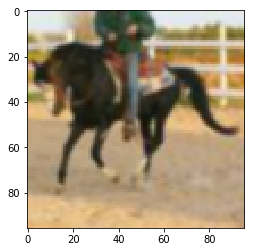

In [8]:
print('ぼかし')
img_conv = ndimage.blur(img)
util.show_np_img(img_conv)

ndimage.py: loaded as module file
シャープ化（ぼかしの逆でくっきりさせる）


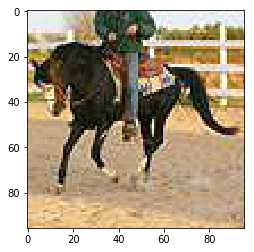

In [12]:
print('シャープ化（ぼかしの逆でくっきりさせる）')
img_conv = ndimage.unsharp_mask(img)
util.show_np_img(img_conv)

ndimage.py: loaded as module file
メディアンフィルタ


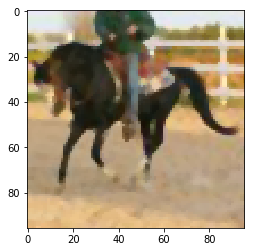

In [11]:
print('メディアンフィルタ')
# （画像のノイズを除去する手法の1つで、ある画素を、周りの画素の濃度の中央値に変換することである。
#     メディアンフィルタは、画像を平滑化することなく、画像のエッジ部分をそのまま残してノイズが除去
img_conv = ndimage.median(img)
util.show_np_img(img_conv)

明度の変更


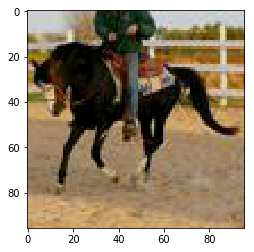

In [13]:
print('明度の変更')
img_conv = ndimage.brightness(img)
util.show_np_img(img_conv)

ndimage.py: loaded as module file
コントラストの変更


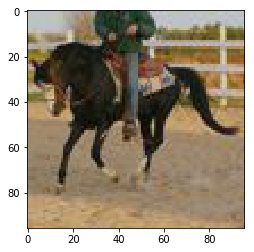

In [14]:
print('コントラストの変更')
img_conv = ndimage.contrast(img)
util.show_np_img(img_conv)

ndimage.py: loaded as module file
彩度の変更


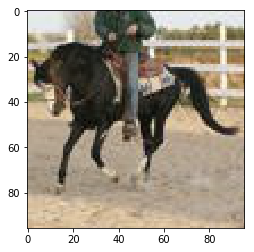

In [15]:
print('彩度の変更')
img_conv = ndimage.saturation(img)
util.show_np_img(img_conv)

グレースケール化


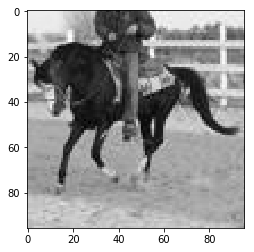

In [6]:
print('グレースケール化')
img_conv = ndimage.to_grayscale(img)
util.show_np_img(img_conv, is_grayscale=True)

標準化。0～255に適当に収める


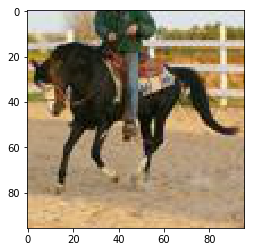

In [8]:
print('標準化。0～255に適当に収める')
img_conv = ndimage.standardize(img)
util.show_np_img(img_conv)

In [16]:
print('二値化(白黒化)')
img_conv = ndimage.binarize(img, threshold=100)
util.show_np_img(img_conv)

二値化(白黒化)


TypingError: Failed in nopython mode pipeline (step: nopython frontend)
[1m[1m[1mInvalid use of Function(<built-in function where>) with argument(s) of type(s): (array(bool, 3d, C), uint8, uint8)
 * parameterized
[1mIn definition 0:[0m
[1m    AttributeError: 'Integer' object has no attribute 'ndim'[0m
    raised from C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v3\lib\site-packages\numba\typing\npydecl.py:1149
[1mIn definition 1:[0m
[1m    AttributeError: 'Integer' object has no attribute 'ndim'[0m
    raised from C:\Users\shingo\Anaconda3\envs\tfgpu_py36_v3\lib\site-packages\numba\typing\npydecl.py:1149
[1mThis error is usually caused by passing an argument of a type that is unsupported by the named function.[0m[0m
[0m[1m[1] During: resolving callee type: Function(<built-in function where>)[0m
[0m[1m[2] During: typing of call at C:\Users\shingo\jupyter_notebook\tfgpu_py36_work\02_keras_py\experiment\01_code_test\../..\transformer\ndimage.py (377)
[0m
[1m
File "..\..\transformer\ndimage.py", line 377:[0m
[1mdef binarize(rgb: np.ndarray, threshold) -> np.ndarray:
    <source elided>
    assert 0 < threshold < 255
[1m    return np.where(rgb >= threshold, np.uint8(255), np.uint8(0))
[0m    [1m^[0m[0m

This is not usually a problem with Numba itself but instead often caused by
the use of unsupported features or an issue in resolving types.

To see Python/NumPy features supported by the latest release of Numba visit:
http://numba.pydata.org/numba-doc/dev/reference/pysupported.html
and
http://numba.pydata.org/numba-doc/dev/reference/numpysupported.html

For more information about typing errors and how to debug them visit:
http://numba.pydata.org/numba-doc/latest/user/troubleshoot.html#my-code-doesn-t-compile

If you think your code should work with Numba, please report the error message
and traceback, along with a minimal reproducer at:
https://github.com/numba/numba/issues/new


90度回転


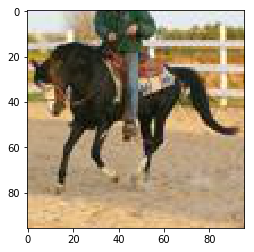

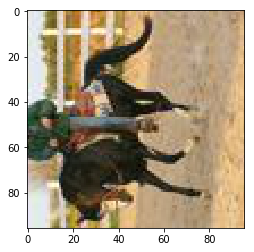

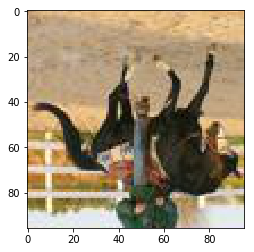

In [18]:
print('90度回転')
for i in range(3):
    img_conv = ndimage.rot90(img, k=i)
    util.show_np_img(img_conv)

ヒストグラム平坦化


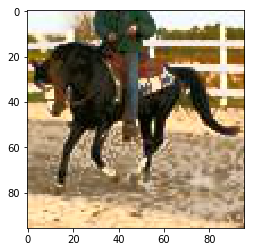

In [19]:
print('ヒストグラム平坦化')
img_conv = ndimage.equalize(img)
util.show_np_img(img_conv)

オートコントラスト


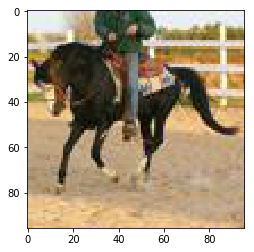

In [20]:
print('オートコントラスト')
img_conv = ndimage.auto_contrast(img)
util.show_np_img(img_conv)

ndimage.py: loaded as module file
ndimage.py: loaded as module file
ポスタリゼーション


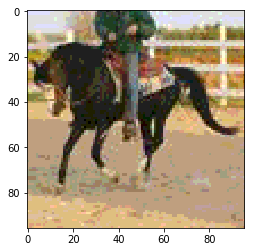

In [21]:
print('ポスタリゼーション')
# (グラフィックの階調（色数の表現段階）を下げる画像処理です。
# いわゆる「フルカラー」はRGBそれぞれ256階調（段階）で表現されていますが、
# この階調を変えてやることでイラスト風の雰囲気に変えるなど様々な効果を出すことができます)
img_conv = ndimage.posterize(img)
util.show_np_img(img_conv)